# Final Assignment Part 1

Resource: IBM Data Visualization with Python - Week 5

## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


**Objectives**

After completing this lab you will be able to:

- Create informative and visually appealing plots with Matplotlib and Seaborn.
- Apply visualization to communicate insights from the data.
- Analyze data through using visualizations.
- Customize visualizations


## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

## Scenario

In this assignment you will be tasked with creating plots which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

## Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


## Importing Data

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"


In [3]:
df = pd.read_csv(URL)
df.head(3)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York


In [4]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [5]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

## Creating Visualizations for Data Analysis

### TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year

In [4]:
df_sales_yearly = df.groupby('Year')['Automobile_Sales'].mean()
df_sales_yearly

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990     917.275000
1991     655.891667
1992    1647.700000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    1286.791667
2001     692.133333
2002    1783.216667
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    1289.550000
2009     631.691667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    2355.166667
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

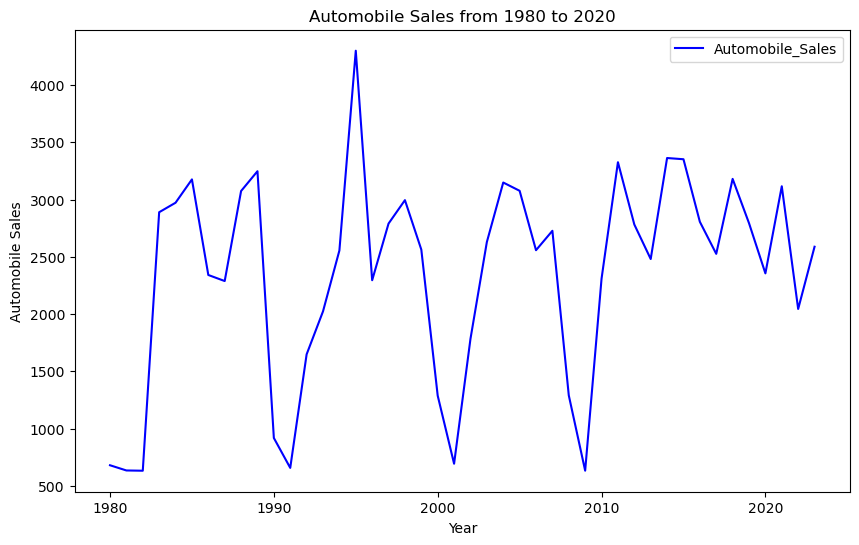

In [5]:
df_sales_yearly.plot(kind='line', figsize=(10, 6), color='blue')
plt.title('Automobile Sales from 1980 to 2020')
plt.ylabel('Automobile Sales')
plt.xlabel('Year')
plt.legend()
plt.show()

** Add the annotation by 2 years on the x axis**

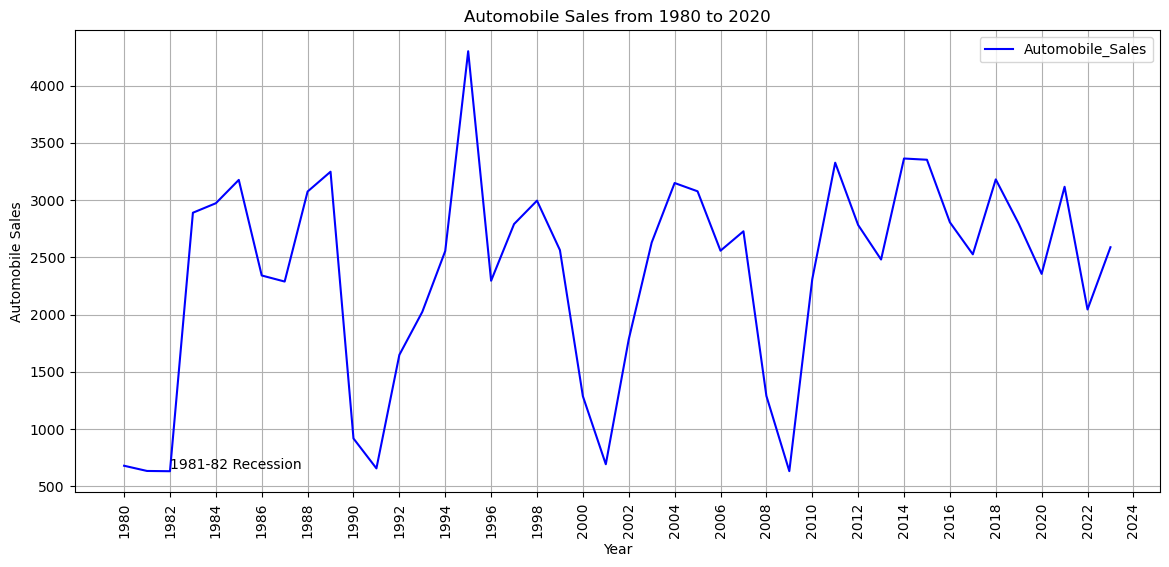

In [6]:
df_sales_yearly.plot(kind='line', figsize=(14, 6), color='blue')

plt.title('Automobile Sales from 1980 to 2020')
plt.ylabel('Automobile Sales')
plt.xlabel('Year')
plt.xticks(np.arange(1980, 2025, 2), rotation=90)
plt.text(1982, 650, '1981-82 Recession')
plt.grid()
#plt.text(......, ..., '..............')
plt.legend()
plt.show()

In [7]:
# make list from 1980 to 2023
years = list(range(1980, 2025,2))
print(years)

[1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]


### Task 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [33]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [8]:
# Assuming 'df' is your dataset
df_rec = df[df['Recession'] == 1]

In [9]:
# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year','Vehicle_Type'],as_index=False)['Automobile_Sales'].mean()
df_Mline

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000
5,1981,Supperminicar,630.900000
6,1982,Mediumfamilycar,723.271429
7,1982,Smallfamiliycar,602.225000
8,1982,Sports,102.000000
9,1983,Smallfamiliycar,589.000000


In [10]:
# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())
df_Mline

,Year,Vehicle_Type,Automobile_Sales,Normalized_Sales
0,1980,Mediumfamilycar,720.625000,1.074659
1,1980,Smallfamiliycar,695.233333,1.049896
2,1980,Supperminicar,635.840000,0.947466
3,1981,Mediumfamilycar,628.400000,0.937125
4,1981,Smallfamiliycar,638.420000,0.964100
5,1981,Supperminicar,630.900000,0.940105
6,1982,Mediumfamilycar,723.271429,1.078606
7,1982,Smallfamiliycar,602.225000,0.909441
8,1982,Sports,102.000000,0.598826
9,1983,Smallfamiliycar,589.000000,0.889469


In [11]:
# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)
df_Mline

,Vehicle_Type,Automobile_Sales,Normalized_Sales
Year,,,
1980,Mediumfamilycar,720.625000,1.074659
1980,Smallfamiliycar,695.233333,1.049896
1980,Supperminicar,635.840000,0.947466
1981,Mediumfamilycar,628.400000,0.937125
1981,Smallfamiliycar,638.420000,0.964100
1981,Supperminicar,630.900000,0.940105
1982,Mediumfamilycar,723.271429,1.078606
1982,Smallfamiliycar,602.225000,0.909441
1982,Sports,102.000000,0.598826


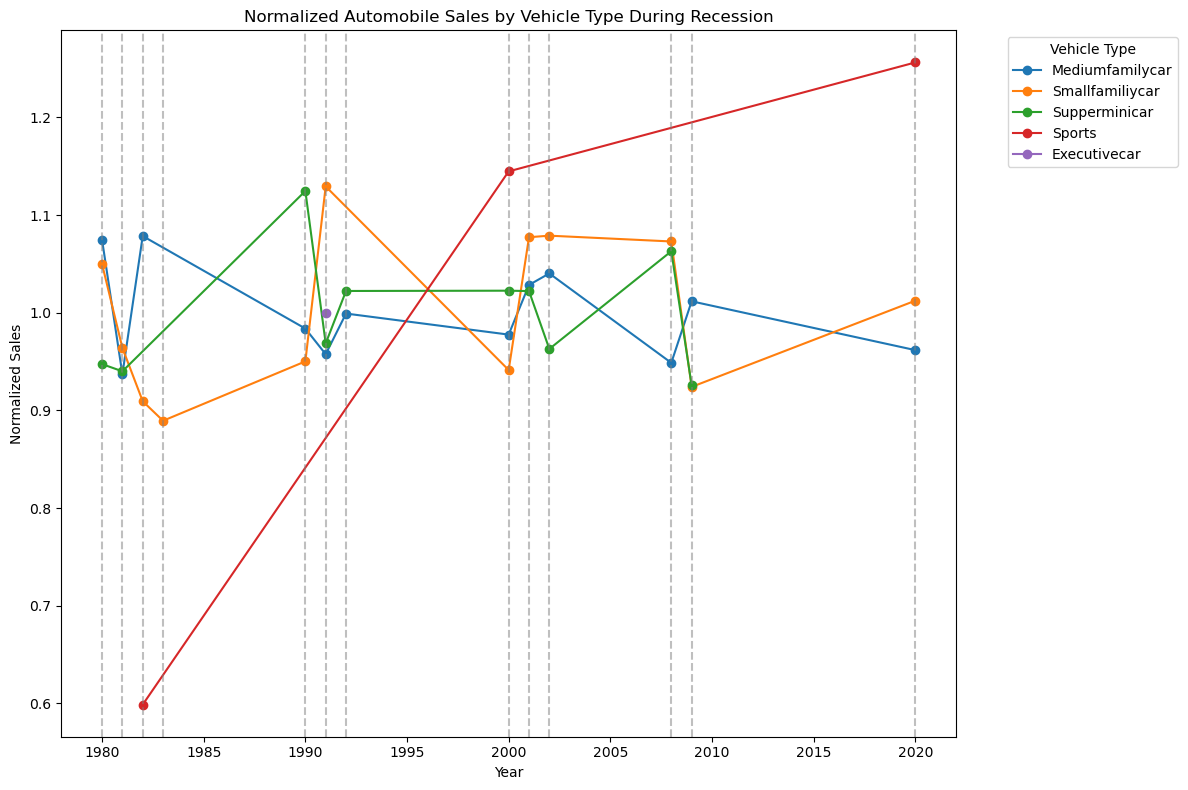

In [12]:
# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)


# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()

### Task 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

In [13]:
df.head(3)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York


In [14]:
# sales in recession period
df_sales_rec = df[df['Recession']==1].groupby('Year')['Automobile_Sales'].mean()
df_sales_rec

Year
1980    678.950000
1981    633.408333
1982    631.150000
1983    589.000000
1990    648.981818
1991    655.891667
1992    675.400000
2000    607.500000
2001    692.133333
2002    676.150000
2008    678.144444
2009    631.691667
2020    543.575000
Name: Automobile_Sales, dtype: float64

In [15]:
# sales in non-recession period
df_sales_non_rec = df[df['Recession']==0].groupby('Year')['Automobile_Sales'].mean()
df_sales_non_rec

Year
1983    3098.472727
1984    2972.250000
1985    3176.133333
1986    2341.133333
1987    2288.166667
1988    3074.500000
1989    3247.608333
1990    3868.500000
1992    1971.800000
1993    2023.250000
1994    2554.825000
1995    4300.250000
1996    2295.208333
1997    2790.241667
1998    2994.891667
1999    2562.683333
2000    3324.666667
2002    2336.750000
2003    2628.991667
2004    3148.883333
2005    3076.566667
2006    2557.650000
2007    2727.166667
2008    3123.766667
2010    2308.600000
2011    3326.300000
2012    2782.216667
2013    2480.583333
2014    3362.908333
2015    3352.233333
2016    2805.803333
2017    2525.816667
2018    3180.608333
2019    2793.733333
2020    3260.962500
2021    3116.041667
2022    2044.141667
2023    2587.933333
Name: Automobile_Sales, dtype: float64

In [16]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
new_df

,Recession,Automobile_Sales
0,0,2816.753590
1,1,648.516814


C:\Users\88017\AppData\Local\Temp\ipykernel_20368\4161705806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=new_df, x='Recession', y='Automobile_Sales', palette='coolwarm')
C:\Users\88017\AppData\Local\Temp\ipykernel_20368\4161705806.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


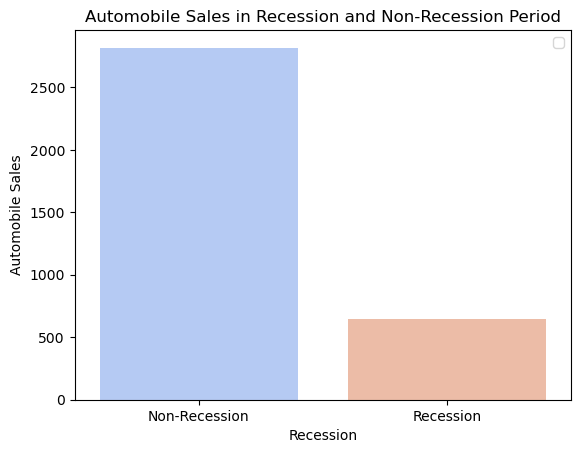

In [18]:
#new_df.plot(kind='bar', x='Recession', y='Automobile_Sales', figsize=(10, 6), color=['blue','red'], alpha=0.5)
sns.barplot(data=new_df, x='Recession', y='Automobile_Sales', palette='coolwarm')
plt.title('Automobile Sales in Recession and Non-Recession Period')
plt.ylabel('Automobile Sales')
plt.xlabel('Recession')
plt.xticks([0, 1], ['Non-Recession', 'Recession'], rotation=0)
plt.legend()
plt.show()

In [19]:
# sales based on different vehicle types on recession period
df_sales_rec_vehicle = df[df['Recession']==1].groupby('Vehicle_Type')['Automobile_Sales'].mean()
df_sales_rec_vehicle

Vehicle_Type
Executivecar       564.000000
Mediumfamilycar    674.847619
Smallfamiliycar    650.733333
Sports             170.333333
Supperminicar      659.270968
Name: Automobile_Sales, dtype: float64

In [20]:
# sales based on different vehicle types on non-recession period
df_sales_non_rec_vehicle = df[df['Recession']==0].groupby('Vehicle_Type')['Automobile_Sales'].mean()
df_sales_non_rec_vehicle

Vehicle_Type
Executivecar       2686.436232
Mediumfamilycar    2981.501935
Smallfamiliycar    2752.658140
Sports             2910.636264
Supperminicar      2495.242222
Name: Automobile_Sales, dtype: float64

In [21]:
sns.barplot(data=df, x='Vehicle_type',y='Automobile_Sales', hue='Recession', palette='coolwarm')
plt.title('Automobile Sales in Recession and Non-Recession Period by Vehicle Type')
plt.ylabel('Automobile Sales')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45)
plt.legend(title='Recession')
plt.show()

ValueError: Could not interpret value `Vehicle_type` for `x`. An entry with this name does not appear in `data`.

In [22]:
 #Filter the data for recessionary periods
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
dd

,Recession,Vehicle_Type,Automobile_Sales
0,0,Executivecar,2686.436232
1,0,Mediumfamilycar,2981.501935
2,0,Smallfamiliycar,2752.658140
3,0,Sports,2910.636264
4,0,Supperminicar,2495.242222
5,1,Executivecar,564.000000
6,1,Mediumfamilycar,674.847619
7,1,Smallfamiliycar,650.733333
8,1,Sports,170.333333
9,1,Supperminicar,659.270968


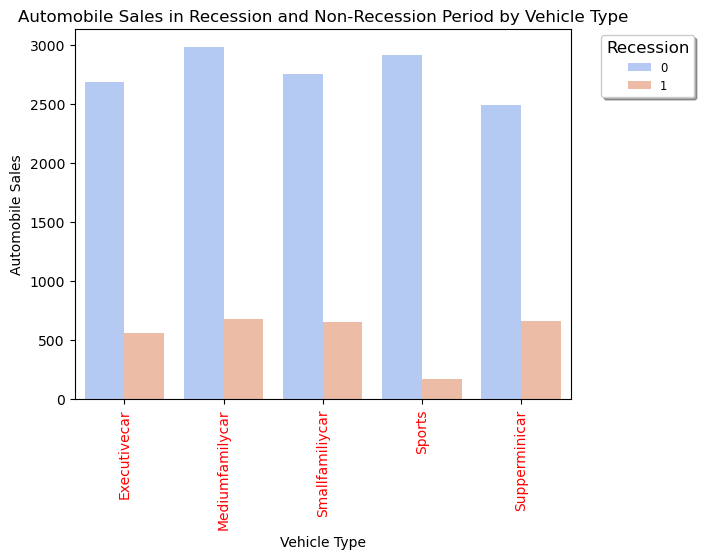

In [23]:
sns.barplot(data=dd, x='Vehicle_Type',y='Automobile_Sales', hue='Recession', palette='coolwarm')


plt.title('Automobile Sales in Recession and Non-Recession Period by Vehicle Type')
plt.ylabel('Automobile Sales')
plt.xlabel('Vehicle Type')

plt.xticks(rotation=90, color='Red')
# legend title: 0=Non-Recession, 1=Recession
plt.legend(title='Recession', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='12', shadow=True, fancybox=True, frameon=True)
plt.show()

In [24]:
recession_data.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


### Task 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

In [26]:
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [27]:
df_rec.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [28]:
df_non_rec = df[df['Recession']==0] # non-recession period
df_non_rec.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California


In [29]:
df_gdp_yearly_non_rec = df_non_rec.groupby('Year')['GDP'].mean()
df_gdp_yearly_non_rec

Year
1983    32.686091
1984    39.260750
1985    46.354500
1986    33.154750
1987    41.125833
1988    37.416833
1989    39.918083
1990    58.261000
1992    48.232111
1993    37.494667
1994    40.367750
1995    31.373417
1996    49.163167
1997    39.102667
1998    36.740167
1999    41.362750
2000    62.682000
2002    44.374000
2003    43.843333
2004    47.619750
2005    46.269500
2006    42.242167
2007    47.380083
2008    42.430333
2010    37.689833
2011    34.331250
2012    44.476833
2013    46.048167
2014    33.645083
2015    32.863417
2016    46.635583
2017    46.108167
2018    37.800583
2019    44.554917
2020    40.709250
2021    33.110667
2022    37.704167
2023    38.982917
Name: GDP, dtype: float64

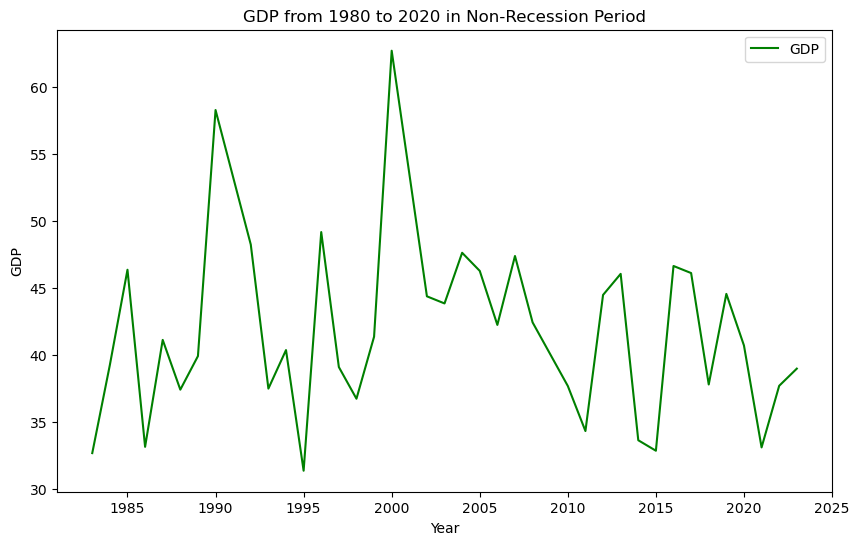

In [33]:
df_gdp_yearly_non_rec.plot(kind='line',figsize=(10,6),color='green')
plt.title('GDP from 1980 to 2020 in Non-Recession Period')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.legend()
plt.show()


In [34]:
df_gdp_yearly_rec = df_rec.groupby('Year')['GDP'].mean()
df_gdp_yearly_rec

Year
1980    41.101917
1981    35.615250
1982    39.580667
1983    22.287000
1990    36.477182
1991    33.833250
1992    41.585333
2000    39.588111
2001    37.122083
2002    41.280750
2008    36.503778
2009    41.210583
2020    30.403250
Name: GDP, dtype: float64

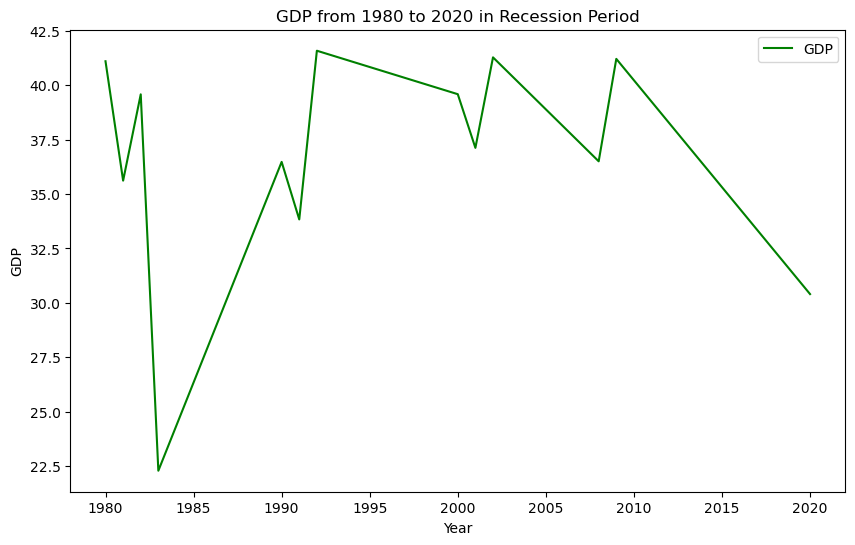

In [35]:
df_gdp_yearly_rec.plot(kind='line',figsize=(10,6),color='green')
plt.title('GDP from 1980 to 2020 in Recession Period')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.legend()
plt.show()


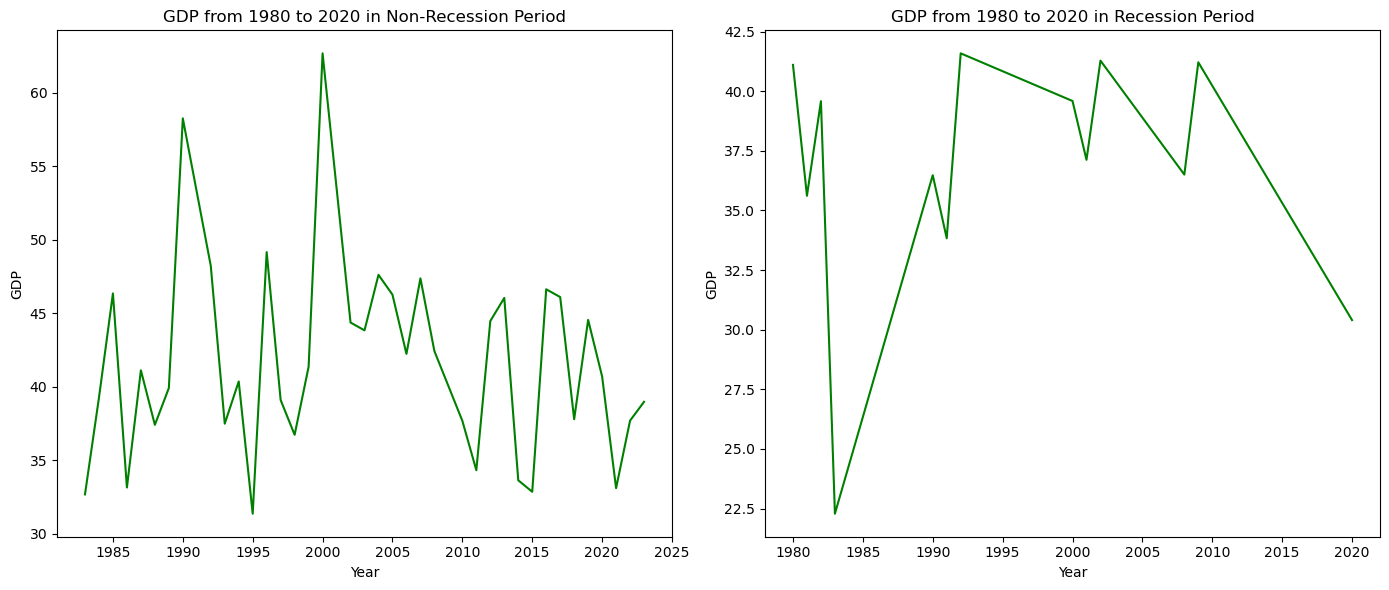

In [38]:
# Create a figure with 1 row and 2 columns

fig = plt.figure(figsize=(14, 6))
# Create a subplot with 1 row, 2 columns
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

# Plot the GDP for non-recession period
sns.lineplot(data=df_gdp_yearly_non_rec, ax=ax0, color='green')
ax0.set_title('GDP from 1980 to 2020 in Non-Recession Period')
ax0.set_ylabel('GDP')
ax0.set_xlabel('Year')


# Plot the GDP for recession period
sns.lineplot(data=df_gdp_yearly_rec, ax=ax1, color='green')
ax1.set_title('GDP from 1980 to 2020 in Recession Period')
ax1.set_ylabel('GDP')
ax1.set_xlabel('Year')

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

Hint: Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble

C:\Users\88017\AppData\Local\Temp\ipykernel_20368\1488552127.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=non_rec_data, x='Month',y='Automobile_Sales',size=size_bubble, alpha=0.5, palette='coolwarm')


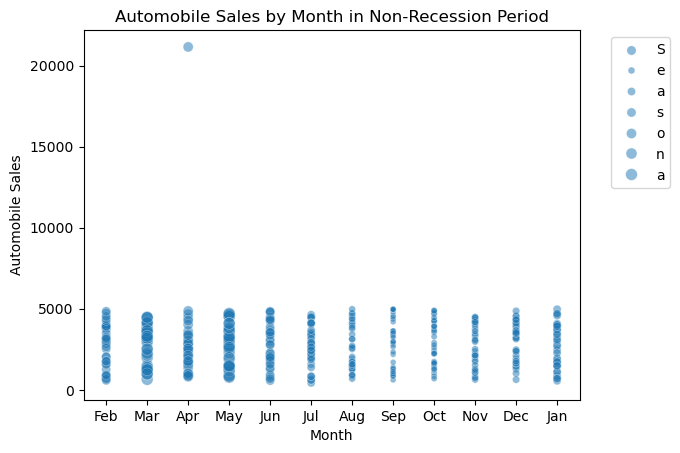

In [47]:
non_rec_data = df[df['Recession'] == 0] # non-recession period
size_bubble = non_rec_data['Seasonality_Weight']   # size of the bubble

sns.scatterplot(data=non_rec_data, x='Month',y='Automobile_Sales',size=size_bubble, alpha=0.5, palette='coolwarm')
plt.title('Automobile Sales by Month in Non-Recession Period')
plt.ylabel('Automobile Sales')
plt.xlabel('Month')
plt.legend('Seasonablity Impact', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [48]:
df.plot(kind='scatter', x='Month', y='Automobile_Sales', figsize=(10, 6), color='blue')
plt.title('Automobile Sales by Month')
plt.ylabel('Automobile Sales')
plt.xlabel('Month')
plt.legend()
#plt.show()

C:\Users\88017\AppData\Local\Temp\ipykernel_20368\3061146330.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.

In [49]:
df_rec.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


C:\Users\88017\AppData\Local\Temp\ipykernel_20368\4080361518.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


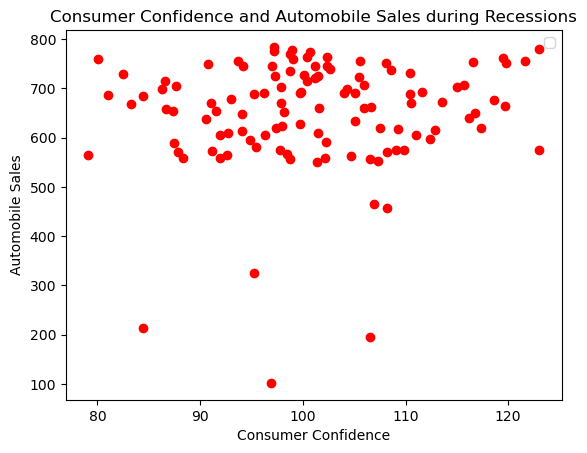

In [53]:
plt.scatter(df_rec['Consumer_Confidence'],df_rec['Automobile_Sales'], color='red')
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.ylabel('Automobile Sales')
plt.xlabel('Consumer Confidence')
plt.legend()
plt.show()

### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


In [54]:
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [65]:
advertising_cost_rec = df_rec['Advertising_Expenditure'].sum()
advertising_cost_rec

339910

In [64]:
advertising_cost_non_rec =df_non_rec['Advertising_Expenditure'].sum()
advertising_cost_non_rec

1279707

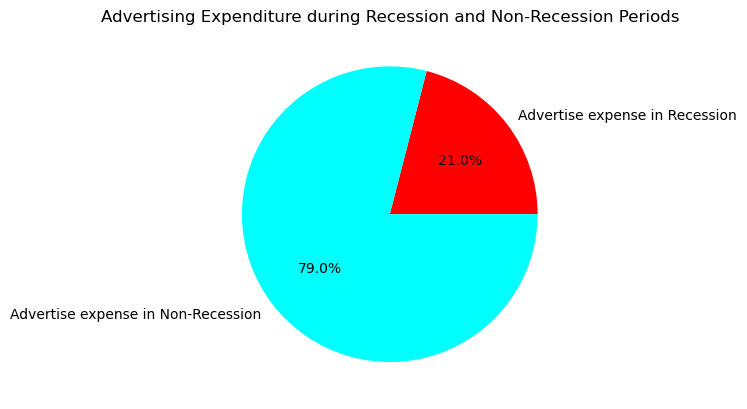

In [71]:
plt.pie([advertising_cost_rec, advertising_cost_non_rec], labels=['Advertise expense in Recession','Advertise expense in Non-Recession'], autopct='%1.1f%%', colors=['red','cyan'])
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

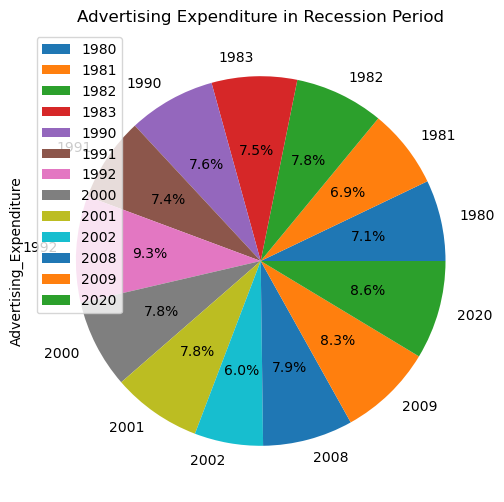

In [62]:
df_rec_advertize.plot(kind='pie', figsize=(10,6), autopct='%1.1f%%')
plt.title('Advertising Expenditure in Recession Period')
plt.legend()
plt.show()